In [87]:
# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt 
# import matplotlib.colors as mcolors
import random
import datetime
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

# import modul mean_absolute_error dari library sklearn
from sklearn.metrics import mean_absolute_error

#import math agar program dapat menggunakan semua fungsi yang ada pada modul math.(ex:sqrt)
import math

#extract model
import joblib

# me-non aktifkan peringatan pada python
import warnings 
warnings.simplefilter('ignore')

In [88]:
# check data Mobility Report
mobility = pd.read_csv('D:/TI/AI/Data Science/Covid19/JAKARTA MOBILITY REPORT.csv')
#drop data yang ga kepake
mobility = mobility.drop(mobility.columns[[0, 1,2,3,4,5,6,7]], axis=1)
mobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,1/1/2021,-46,-27,-51,-61,-73,22
1,1/2/2021,-39,-15,-50,-41,-33,11
2,1/3/2021,-40,-19,-58,-34,-15,9
3,1/4/2021,-29,-5,-50,-39,-32,13
4,1/5/2021,-32,-9,-53,-39,-33,14
...,...,...,...,...,...,...,...
284,10/12/2021,-16,4,-35,-33,-30,10
285,10/13/2021,-15,4,-33,-32,-28,9
286,10/14/2021,-15,5,-32,-33,-28,10
287,10/15/2021,-12,8,-25,-31,-26,10


In [89]:
# check data Mobility Report
mobility = pd.read_csv('D:/TI/AI/Data Science/Covid19/JAKARTA MOBILITY REPORT.csv')
#drop data yang ga kepake
mobility = mobility.drop(mobility.columns[[0, 1,2,3,4,5,6,7]], axis=1)

mobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,1/1/2021,-46,-27,-51,-61,-73,22
1,1/2/2021,-39,-15,-50,-41,-33,11
2,1/3/2021,-40,-19,-58,-34,-15,9
3,1/4/2021,-29,-5,-50,-39,-32,13
4,1/5/2021,-32,-9,-53,-39,-33,14
...,...,...,...,...,...,...,...
284,10/12/2021,-16,4,-35,-33,-30,10
285,10/13/2021,-15,4,-33,-32,-28,9
286,10/14/2021,-15,5,-32,-33,-28,10
287,10/15/2021,-12,8,-25,-31,-26,10


In [90]:
# cek range tanggal yang akan diambil dari 8/1/2021 hingga akhir
mobility['date'] = pd.to_datetime(mobility['date'])
start_date = '1/1/2021'
end_date = '2021-10-16'
mask = (mobility['date'] >= start_date)
mobility = mobility.loc[mask]
mobility = mobility.reset_index(drop=True)
mobility

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01-01,-46,-27,-51,-61,-73,22
1,2021-01-02,-39,-15,-50,-41,-33,11
2,2021-01-03,-40,-19,-58,-34,-15,9
3,2021-01-04,-29,-5,-50,-39,-32,13
4,2021-01-05,-32,-9,-53,-39,-33,14
...,...,...,...,...,...,...,...
284,2021-10-12,-16,4,-35,-33,-30,10
285,2021-10-13,-15,4,-33,-32,-28,9
286,2021-10-14,-15,5,-32,-33,-28,10
287,2021-10-15,-12,8,-25,-31,-26,10


In [91]:
mobility['retail_and_recreation_percent_change_from_baseline']

0     -46
1     -39
2     -40
3     -29
4     -32
       ..
284   -16
285   -15
286   -15
287   -12
288   -15
Name: retail_and_recreation_percent_change_from_baseline, Length: 289, dtype: int64

# asdas

In [92]:
# import data Rapid test anti gen dengan sheet RDT Ag 
rdt_ag = pd.read_excel('D:/TI/AI/Data Science/Covid19/Covid19_Jakarta.xlsx',sheet_name='RDT Ag')
rdt_ag

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,...,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
1,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,1192,76,1116,0.0637584,1192,76,1116,0.0637584
2,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1192,76,1116,0.0637584
3,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,607,24,583,0.0395387,1799,100,1699,0.0555864
4,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.0555864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,329.0,2021-11-25 00:00:00,8164,132247,140411,0.0581436,48273,3219030,3267303,0.0147746,...,1016,0.0413386,44435,8,44427,0.000180038,3408730,56479,3352251,0.0165689
330,330.0,2021-11-26 00:00:00,8166,132475,140641,0.0580627,48288,3263423,3311711,0.014581,...,1016,0.0413386,44638,17,44621,0.000380841,3453368,56496,3396872,0.0163597
331,331.0,2021-11-27 00:00:00,8166,132631,140797,0.0579984,48293,3307299,3355592,0.0143918,...,1016,0.0413386,44037,5,44032,0.000113541,3497405,56501,3440904,0.0161551
332,332.0,2021-11-28 00:00:00,8169,132773,140942,0.05796,48297,3342704,3391001,0.0142427,...,1016,0.0413386,35554,7,35547,0.000196884,3532959,56508,3476451,0.0159945


In [93]:
# mengganti header dengan column dikarenakan nama column masih tidak sesuai
header_row = 0
rdt_ag.columns = rdt_ag.iloc[header_row]

In [94]:
# drop column 0 agar tidak duplikat
rdt_ag = rdt_ag.drop(0)

In [95]:
# mereset index akibat penghilangan column
rdt_ag = rdt_ag.reset_index(drop=True)
rdt_ag

,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,...,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,1192,76,1116,0.0637584,1192,76,1116,0.0637584
1,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1192,76,1116,0.0637584
2,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,607,24,583,0.0395387,1799,100,1699,0.0555864
3,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.0555864
4,5.0,2021-01-05 00:00:00,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.0555864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,329.0,2021-11-25 00:00:00,8164,132247,140411,0.0581436,48273,3219030,3267303,0.0147746,...,1016,0.0413386,44435,8,44427,0.000180038,3408730,56479,3352251,0.0165689
329,330.0,2021-11-26 00:00:00,8166,132475,140641,0.0580627,48288,3263423,3311711,0.014581,...,1016,0.0413386,44638,17,44621,0.000380841,3453368,56496,3396872,0.0163597
330,331.0,2021-11-27 00:00:00,8166,132631,140797,0.0579984,48293,3307299,3355592,0.0143918,...,1016,0.0413386,44037,5,44032,0.000113541,3497405,56501,3440904,0.0161551
331,332.0,2021-11-28 00:00:00,8169,132773,140942,0.05796,48297,3342704,3391001,0.0142427,...,1016,0.0413386,35554,7,35547,0.000196884,3532959,56508,3476451,0.0159945


In [96]:
# mengecek tipe data dari tiap tiap column
rdt_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nan                        333 non-null    float64
 1   Tgl                        333 non-null    object 
 2   Positif                    333 non-null    object 
 3   Negatif                    333 non-null    object 
 4   Total                      333 non-null    object 
 5   Positivity Rate            333 non-null    object 
 6   Positif                    333 non-null    object 
 7   Negatif                    333 non-null    object 
 8   Total                      333 non-null    object 
 9   Positivity Rate            276 non-null    object 
 10  Positif                    333 non-null    object 
 11  Negatif                    333 non-null    object 
 12  Total                      333 non-null    object 
 13  Positivity Rate            277 non-null    object 

In [97]:
# mengubah tipe data Positivity Rate Kumulatif menjadi numeric agar dapat melakukan regresi
# rdt_ag.astype({'Positivity Rate Kumulatif':'float64'}).dtypes

rdt_ag['Positivity Rate Kumulatif'] = pd.to_numeric(rdt_ag['Positivity Rate Kumulatif'])
# rdt_ag.info()

In [98]:
# mengambil tanggal dengan range tanggal dari 2021-08-01 hingga 10/16/2021
rdt_ag['Tgl'] = pd.to_datetime(rdt_ag['Tgl'])
start_date = '1/1/2021'
end_date = '2021-10-16'
mask = (rdt_ag['Tgl'] >= start_date) & (rdt_ag['Tgl'] <= end_date)
rdt_ag = rdt_ag.loc[mask]
rdt_ag = rdt_ag.reset_index(drop=True)
rdt_ag

,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,...,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
0,1.0,2021-01-01,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,1192,76,1116,0.0637584,1192,76,1116,0.063758
1,2.0,2021-01-02,76,1116,1192,0.0637584,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1192,76,1116,0.063758
2,3.0,2021-01-03,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,607,24,583,0.0395387,1799,100,1699,0.055586
3,4.0,2021-01-04,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586
4,5.0,2021-01-05,100,1699,1799,0.0555864,0,0,0,NaN,...,0,NaN,0,0,0,NaN,1799,100,1699,0.055586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285.0,2021-10-12,8151,127162,135313,0.0602381,47837,1870945,1918782,0.0249309,...,1016,0.0413386,30504,25,30479,0.000819565,2055111,56030,1999081,0.027264
285,286.0,2021-10-13,8151,127409,135560,0.0601284,47848,1899130,1946978,0.0245755,...,1016,0.0413386,28443,11,28432,0.000386738,2083554,56041,2027513,0.026897
286,287.0,2021-10-14,8155,127553,135708,0.0600923,47873,1931678,1979551,0.0241838,...,1016,0.0413386,32721,29,32692,0.000886281,2116275,56070,2060205,0.026495
287,288.0,2021-10-15,8155,127742,135897,0.0600087,47886,1957417,2005303,0.0238797,...,1016,0.0413386,25941,13,25928,0.000501137,2142216,56083,2086133,0.026180


# cek rdt positif dan tes harian


<function matplotlib.pyplot.show(*args, **kw)>

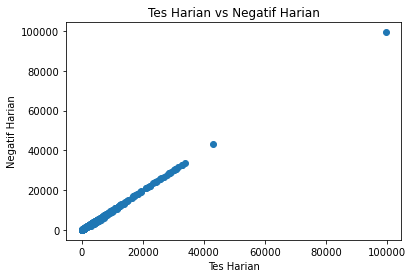

In [99]:
plt.scatter(rdt_ag['Tes Harian'],rdt_ag['Negatif Harian'])
plt.xlabel('Tes Harian')
plt.ylabel('Negatif Harian')
plt.title('Tes Harian vs Negatif Harian')
plt.show

In [100]:
# Prepare data
# Pertama, buat variabel x dan y.
x = rdt_ag['Tes Harian'].values.reshape(-1,1)
y = rdt_ag['Negatif Harian'].values.reshape(-1,1)
# y = y.fillna()

In [101]:
#cari mean
x_mean = np.mean(x)
y_mean = np.mean(y)
print('nilai mean var x: ', x_mean,'\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  7528.961937716263 
nilai mean var y:  7334.813148788928


In [102]:
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  [0.9996228788369895]


In [103]:
# slope
# Slope adalah tingkat kemiringan garis, intercept 
# adalah jarak titik y pada garis dari titik 0
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [1.0011210514169921]


# yang ini baru nyobain make regressor

In [104]:
# split data testing dan training
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [105]:
regressor = LinearRegression()

In [106]:
#fit data training dengan label
regressor.fit(x_train, y_train)

LinearRegression()

In [107]:
#cek koefisien dengan nilai interceptnya
print(regressor.coef_)
print(regressor.intercept_)

[[1.00044481]]
[-190.08531655]


In [108]:
# cek akurasi dari testing dan label
print("tingkat akurasinya :",regressor.score(x_test,y_test))

tingkat akurasinya : 0.9996602455637976


In [109]:
# hasil nilai korelasinya
print('Correlation: ', math.sqrt(regressor.score(x_test,y_test)))

Correlation:  0.9998301083503125


Text(0.5, 1.0, 'positif vs pertumbuhan retail')

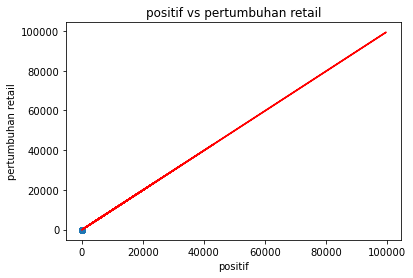

In [110]:
# visualisasi regressor
y_prediksi = regressor.predict(x_test)

plt.scatter(rdt_ag['Positivity Rate Kumulatif'], mobility['retail_and_recreation_percent_change_from_baseline'])
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('positif')
plt.ylabel('pertumbuhan retail')
plt.title('positif vs pertumbuhan retail')

In [111]:
# coba test prediksi
print('nilai prediksi pertumbuhan retail dengan positif 22222 : ',regressor.predict([[222222]]))
print('nilai prediksi pertumbuhan retail dengan positif 222 : ',regressor.predict([[222]]))

nilai prediksi pertumbuhan retail dengan positif 22222 :  [[222130.76145377]]
nilai prediksi pertumbuhan retail dengan positif 222 :  [[32.01343147]]


In [112]:
# coba nampilin test dan label dan prediksi
np_table = np.concatenate((x_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['x_test | positif','y_test | label','y_predict | predukssi pertumbuhan'])

In [113]:
new_dataframe

,x_test | positif,y_test | label,y_predict | predukssi pertumbuhan
0,4397,3658,4208.87
1,4808,4374,4620.05
2,4042,3956,3853.71
3,4619,4515,4430.97
4,21544,21473,21363.5
5,4263,4107,4074.81
6,2520,2452,2331.04
7,5347,4799,5159.29
8,32721,32692,32545.5
9,19530,19449,19348.6


In [114]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi))) 

Mean Absolute Error: 193.47960866697306
Mean Squared Error: 74494.79450684339
Root Mean Squared Error: 272.93734538689165


In [115]:
filename = "model_negative.sav"
joblib.dump(regressor.fit(x_train, y_train), filename)

['model_negative.sav']

In [116]:
loaded_model = joblib.load(filename)

In [121]:
loaded_model.predict([[10000]])

array([[9814.36279256]])